# **Practical assignment for Topic 4**

**Link to your finished ipynb file in Google Colab:** [*link*](https://drive.google.com/drive/folders/1O7lgan6Bt1PbI5Uj_KoARl18Y1ttsc1e?usp=sharing)

---

In your assigmnet, you will use the following **data**:

In [24]:
import numpy as np
X = np.array([-3.00, -2.54, -2.08, -1.62, -1.15, -0.69, -0.23,  0.23,  0.69,  1.15,  1.62,  2.08,  2.54,  3.00]).reshape(14, 1)
y = np.array([ 2.60,  2.81,  3.49,  4.08,  3.30,  3.43,  4.59,  4.65,  4.79,  6.45,  7.58,  9.78, 12.98, 15.49]).reshape(14, 1)

Your assignment consists of the following tasks:

1. Create a total of eight polynomials from degree 1 to 8. Compute and print training MSE and validation MSE values for each of them. Validation MSE should be computed using LOOCV (use the function that we already created). Draw a plot with two curves analogous to the plot shown in slide 9 from today's lecture. Add a legend so that it is clear which curve is which.
2. Repeat Task 1 with a modified LOOCV function so that it does not use anything from scikit-learn anymore - instead it should use only numpy. You should get the same result as in Task 1.
3. Explain the plot from Task 1. What exactly do we see in it and what conclusions can we make from it?
4. Draw another plot showing all datapoints of the given dataset together with the curves of all eight polynomials from degree 1 to 8. Each curve should be in a different color. Add a legend so that it is clear which curve is which.<br>
4.a. Do the task using scikit-learn.<br>
4.b. Do the task using numpy.

*While doing the tasks you are allowed to use only those function libraries and only those functions of numpy and scikit-learn libraries that we already have used in our notebooks of the course.*

**After the tasks are done, submit this file. Do not clear it's output - all print-outs and diagrams should be left in the file.**


## Question 1.

LOOCV function that we created in class :

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
loo = LeaveOneOut()
def loocv(X, y, model):
  loo = LeaveOneOut()  # define LOOCV

  yHat = np.empty(y.size)  # this will be filled with predictions for us to compute scores after the loop

  for train_idx, validation_idx in loo.split(X, y):  # loop through all folds
    # from indices to actual data subsets
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_validation = X[validation_idx]
    y_validation = y[validation_idx]

    # train Linear Regression on training data
    model.fit(X_train, y_train)

    # do prediction on the one validation data point
    yHat[validation_idx] = model.predict(X_validation)

  MSE = mean_squared_error(y, yHat)
  R2 = r2_score(y, yHat)

  return MSE, R2

Create a total of eight polynomials from degree 1 to 8. Compute and print training MSE and validation MSE values for each of them. Validation MSE should be computed using LOOCV.

In [26]:
# Build polynomial models from degree 1 to 8 and evaluate them
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

degrees = list(range(1, 9))
train_mse = []
val_mse = []

for degree in degrees:
    # Train on the full dataset to get the training MSE
    full_model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("linreg", LinearRegression())
    ])
    full_model.fit(X, y)
    train_predictions = full_model.predict(X)
    train_error = mean_squared_error(y, train_predictions)
    train_mse.append(train_error)

    # Use LOOCV to estimate validation MSE for the same degree
    cv_model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("linreg", LinearRegression())
    ])
    validation_error, _ = loocv(X, y, cv_model)
    val_mse.append(validation_error)

    print(f"Degree {degree}: training MSE = {train_error:.4f}, validation MSE (LOOCV) = {validation_error:.4f}")


Degree 1: training MSE = 3.3815, validation MSE (LOOCV) = 5.0893
Degree 2: training MSE = 0.5880, validation MSE (LOOCV) = 1.1832
Degree 3: training MSE = 0.1111, validation MSE (LOOCV) = 0.2382
Degree 4: training MSE = 0.1092, validation MSE (LOOCV) = 0.3925
Degree 5: training MSE = 0.1029, validation MSE (LOOCV) = 0.5418
Degree 6: training MSE = 0.0973, validation MSE (LOOCV) = 2.3388
Degree 7: training MSE = 0.0703, validation MSE (LOOCV) = 0.8601
Degree 8: training MSE = 0.0641, validation MSE (LOOCV) = 7.2179


Draw a plot with two curves analogous to the plot shown in slide 9 from today's lecture.

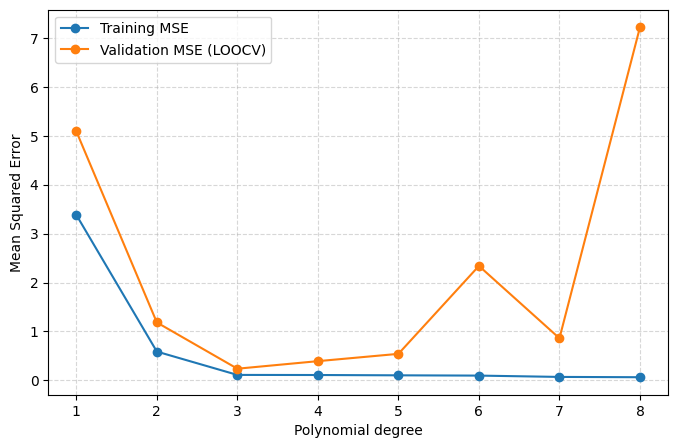

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse, marker="o", label="Training MSE")
plt.plot(degrees, val_mse, marker="o", label="Validation MSE (LOOCV)")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.xticks(degrees)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## Question 2

Repeat question 1 with a modified LOOCV function so that it does not use anything from scikit-learn anymore - instead it should use only numpy. You should get the same result as in Task 1.

Degree 1: training MSE = 3.3815, validation MSE (LOOCV) = 5.0893
Degree 2: training MSE = 0.5880, validation MSE (LOOCV) = 1.1832
Degree 3: training MSE = 0.1111, validation MSE (LOOCV) = 0.2382
Degree 4: training MSE = 0.1092, validation MSE (LOOCV) = 0.3925
Degree 5: training MSE = 0.1029, validation MSE (LOOCV) = 0.5418
Degree 6: training MSE = 0.0973, validation MSE (LOOCV) = 2.3388
Degree 7: training MSE = 0.0703, validation MSE (LOOCV) = 0.8601
Degree 8: training MSE = 0.0641, validation MSE (LOOCV) = 7.2179


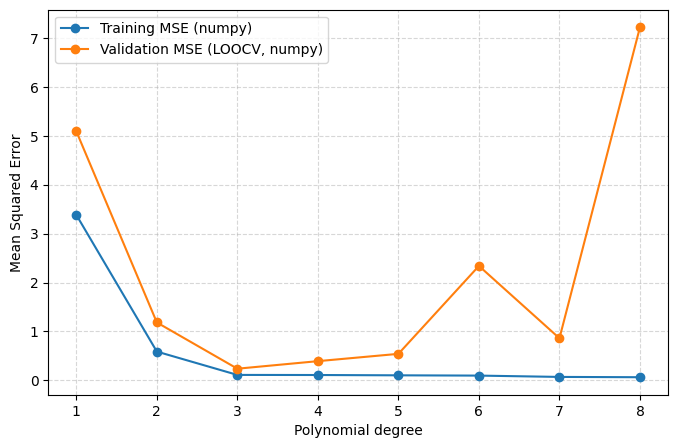

In [28]:
# Repeat Task 1 using a pure numpy LOOCV implementation

def build_polynomial_matrix(x_values, degree):
    # Create columns [1, x, x^2, ..., x^degree] so we can fit a polynomial with numpy
    powers = [x_values ** power for power in range(degree + 1)]
    return np.hstack(powers)

def fit_linear_regression(design_matrix, targets):
    # Solve the least-squares problem with numpy only
    weights, *_ = np.linalg.lstsq(design_matrix, targets, rcond=None)
    return weights

def predict_with_weights(design_matrix, weights):
    # Multiply the design matrix by the learned weights to get predictions
    return design_matrix @ weights

def loocv_numpy(x_values, targets, degree):
    # Manual LOOCV: leave each sample out once, fit on the rest, predict the held-out point
    n_samples = targets.shape[0]
    predictions = np.empty_like(targets)

    for holdout in range(n_samples):
        mask = np.ones(n_samples, dtype=bool)
        mask[holdout] = False

        x_train = x_values[mask]
        y_train = targets[mask]
        x_val = x_values[~mask]

        phi_train = build_polynomial_matrix(x_train, degree)
        phi_val = build_polynomial_matrix(x_val, degree)

        weights = fit_linear_regression(phi_train, y_train)
        predictions[holdout] = predict_with_weights(phi_val, weights)

    mse = np.mean((targets - predictions) ** 2)
    return mse

degrees = list(range(1, 9))
train_mse_numpy = []
val_mse_numpy = []

for degree in degrees:
    phi_full = build_polynomial_matrix(X, degree)
    weights_full = fit_linear_regression(phi_full, y)
    y_train_pred = predict_with_weights(phi_full, weights_full)
    train_error = np.mean((y - y_train_pred) ** 2)

    validation_error = loocv_numpy(X, y, degree)

    train_mse_numpy.append(train_error)
    val_mse_numpy.append(validation_error)

    print(f"Degree {degree}: training MSE = {train_error:.4f}, validation MSE (LOOCV) = {validation_error:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse_numpy, marker="o", label="Training MSE (numpy)")
plt.plot(degrees, val_mse_numpy, marker="o", label="Validation MSE (LOOCV, numpy)")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.xticks(degrees)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## Question 3

##### Explain the plot from Task 1. What exactly do we see in it and what conclusions can we make from it?

The training curve drops regularly as polynomial degree increases because a more flexible model can always fit the training data a bit better.
The validation curve, however, has a clear minimum around degree 3. Degrees 1 and 2 have high validation MSE because the models are too simple and underfit the curved trend in the data. After degree 3 the validation error starts to climb again, even though the training error lowers.
That means the model is overfitting: the higher-degree polynomials follow noise in the training points, so they generalise worse to unseen samples; they don't follow a trend anymore but just try to stick to the points as close as possible. Overall, the LOOCV curve tells us that a cubic polynomial (degree 3) is the sweet spot for this particular dataset, balancing bias and variance best.

## Question 4

##### A - Draw another plot using scikit-learn showing all datapoints of the given dataset together with the curves of all eight polynomials from degree 1 to 8. Each curve should be in a different color. Add a legend so that it is clear which curve is which.

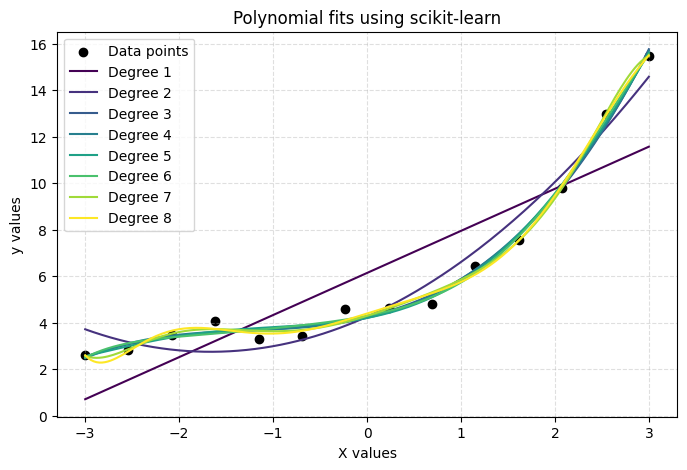

In [29]:
# Plot dataset and polynomial curves using scikit-learn
# Prepare a grid of x-values so we can draw smooth curves

x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
colors = plt.cm.viridis(np.linspace(0, 1, 8))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', label='Data points')

for color, degree in zip(colors, range(1, 9)):
    # Build a polynomial regression model for the current degree
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("linreg", LinearRegression())
    ])
    model.fit(X, y)
    y_curve = model.predict(x_plot)
    plt.plot(x_plot, y_curve, color=color, label=f"Degree {degree}")

plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Polynomial fits using scikit-learn")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


##### B - Draw the same plot using only numpy functions.


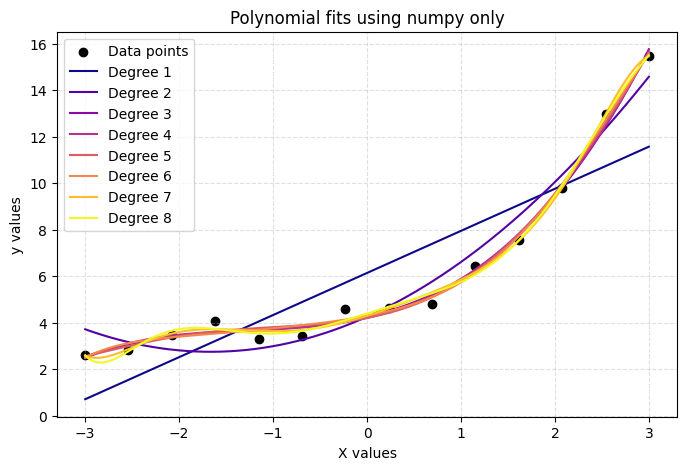

In [30]:
# Plot dataset and polynomial curves using only numpy
# Use the same dense grid of x-values for smooth curves

x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
colors = plt.cm.plasma(np.linspace(0, 1, 8))

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', label='Data points')

for color, degree in zip(colors, range(1, 9)):
    # Fit the polynomial of the current degree with the numpy helpers from Question 2
    phi_full = build_polynomial_matrix(X, degree)
    weights = fit_linear_regression(phi_full, y)
    phi_plot = build_polynomial_matrix(x_plot, degree)
    y_curve = predict_with_weights(phi_plot, weights)
    plt.plot(x_plot, y_curve, color=color, label=f"Degree {degree}")

plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Polynomial fits using numpy only")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
